

###  Exploratory Data Analysis (EDA) on Student Grades

**Goal:** practice end‑to‑end EDA on a small, intentionally "messy" dataset (35 students).  
You will:
- Generate **synthetic data** (First Name, Last Name, Grade).  
- **Inject data issues**: missing values, negative grades, out-of-range values (e.g., 540).  
- Perform **EDA**: preview, schema, summary stats, missingness, range checks, outlier flags.  
- **Fix errors** with documented, reproducible rules.  
- **Visualize** the distribution **before & after** cleaning.  


## 1) Environment Setup

We use standard libraries only:
- `pandas` for data wrangling
- `numpy` for random generation and numeric ops
- `matplotlib` for basic plots

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
rng = np.random.default_rng(4064)
pd.set_option('display.max_rows', 50)
print("Environment ready.")

Environment ready.



## 2) Generate Synthetic Data (50 students)

**Design:**
- Randomly sample first and last names from small lists.
- Generate grades around a typical distribution (mean≈75, std≈12).
- Create a DataFrame with columns: `FirstName`, `LastName`, `Grade`.

We'll **intentionally introduce errors** in the next step.


In [2]:

# Expanded small name banks (feel free to customize or expand)
first_names = [
    "Alex", "Taylor", "Jordan", "Riley", "Casey", "Avery", "Morgan", "Quinn", "Jamie", "Skyler",
    "Sam", "Cameron", "Drew", "Jesse", "Parker", "Rowan", "Hayden", "Reese", "Emerson", "Logan",
    "Milan", "Noa", "Eden", "Remy", "Ari", "Kendall", "Harley", "Corey", "Shay", "Sage",
    "Blake", "Shawn", "Robin", "Kris", "Cody", "Devon", "Elliot", "Finley", "Harper", "Jules",
    "Kerry", "Lane", "Micah", "Nico", "Oakley", "Payton", "Rory", "Sage", "Tatum", "Val"
]

last_names = [
    "Smith", "Lee", "Patel", "Brown", "Martin", "Garcia", "Nguyen", "Johnson", "Williams", "Davis",
    "Miller", "Wilson", "Anderson", "Thomas", "Lopez", "Harris", "Clark", "Lewis", "Walker", "Young",
    "King", "Wright", "Hill", "Scott", "Green", "Baker", "Adams", "Nelson", "Carter", "Mitchell",
    "Perez", "Roberts", "Turner", "Phillips", "Campbell", "Morgan", "Collins", "Cook", "Bell",
    "Murphy", "Bailey", "Rivera", "Cooper", "Richardson", "Cox", "Howard", "Ward", "Torres", "Peterson"
]

# Randomly sample 50 unique students (first + last name combinations)
n_students = 50

# For simplicity, sample with replacement from names to get 50 entries each
sampled_first_names = rng.choice(first_names, size=n_students, replace=True)
sampled_last_names = rng.choice(last_names, size=n_students, replace=True)

# Generate base grades from normal distribution, clipped to valid range, rounded to 1 decimal
base_grades = np.clip(rng.normal(loc=75, scale=12, size=n_students), 0, 100).round(1)

# Create DataFrame
df = pd.DataFrame({
    "FirstName": sampled_first_names,
    "LastName": sampled_last_names,
    "Grade": base_grades
})

# Preview first 10 rows
df.head(10)


,FirstName,LastName,Grade
0,Val,Wilson,77.6
1,Skyler,Green,73.1
2,Drew,Harris,77.0
3,Shay,Brown,70.5
4,Payton,King,75.0
5,Noa,Lewis,89.7
6,Reese,Wilson,89.9
7,Devon,Murphy,71.8
8,Sam,Wilson,76.1
9,Blake,Hill,62.6



## 3) Inject Data Issues (Missing, Negative, Out-of-Range)

We simulate common data quality problems:
- Missing values (`NaN`)
- Negative grades (e.g., `-10`)
- Out-of-range high values (e.g., `540` where `54` was intended)

> **Why simulate problems?** EDA isn't just stats; it's about *diagnosing and repairing* real‑world messiness.


In [3]:
# Copy the original clean DataFrame
df_dirty = df.copy()

# Inject issues at 6 random indices (seeded for reproducibility)
issue_indices = rng.choice(df_dirty.index, size=6, replace=False)

# Inject two missing grades (NaN)
df_dirty.loc[issue_indices[0], "Grade"] = np.nan
df_dirty.loc[issue_indices[1], "Grade"] = np.nan

# Inject two invalid negative grades
df_dirty.loc[issue_indices[2], "Grade"] = -10
df_dirty.loc[issue_indices[3], "Grade"] = -3

# Inject one extreme high value (likely a 10× entry typo, e.g., 540 instead of 54)
df_dirty.loc[issue_indices[4], "Grade"] = 540

# Inject one slightly out-of-bounds high grade (e.g., 104)
df_dirty.loc[issue_indices[5], "Grade"] = 104

# Log the indices where issues were injected
print("Injected issues at indices:", issue_indices.tolist())

# Display first 15 rows to visualize injected issues
df_dirty.head(15)


Injected issues at indices: [44, 29, 22, 47, 48, 7]


,FirstName,LastName,Grade
0,Val,Wilson,77.6
1,Skyler,Green,73.1
2,Drew,Harris,77.0
3,Shay,Brown,70.5
4,Payton,King,75.0
5,Noa,Lewis,89.7
6,Reese,Wilson,89.9
7,Devon,Murphy,104.0
8,Sam,Wilson,76.1
9,Blake,Hill,62.6



## 4) EDA: Quick Preview & Schema

Look at a **sample**, the **schema**, and **summary statistics** to get a sense of the data.


In [4]:
# --- Preview the first few records ---
print(" Sample Records (Head):")
display(df_dirty.head())

# --- Show column data types, non-null counts, memory usage ---
print("\n Data Schema (Info):")
display(df_dirty.info())

# --- Summary statistics for numeric columns (only 'Grade') ---
print("\n Numeric Summary (Describe):")
display(df_dirty.describe())


 Sample Records (Head):


,FirstName,LastName,Grade
0,Val,Wilson,77.6
1,Skyler,Green,73.1
2,Drew,Harris,77.0
3,Shay,Brown,70.5
4,Payton,King,75.0



 Data Schema (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FirstName  50 non-null     object 
 1   LastName   50 non-null     object 
 2   Grade      48 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None


 Numeric Summary (Describe):


,Grade
count,48.000000
mean,85.125000
std,70.264253
min,-10.000000
25%,71.475000
50%,77.300000
75%,87.450000
max,540.000000



## 5) Missingness & Validity Checks

**Checks:**
- Missing values per column
- Count invalid grades: `<0` or `>100`
- Identify obvious 10× typos (e.g., values > 100 and ending with a '0')

> These *rule‑based* checks should be **clear** and **defensible**. Document your assumptions.


In [5]:
# --- Count missing values per column ---
missing_counts = df_dirty.isna().sum()

# --- Count invalid numeric values ---
invalid_negative = (df_dirty["Grade"] < 0).sum(skipna=True)
invalid_over_100 = (df_dirty["Grade"] > 100).sum(skipna=True)

# --- Flag likely 10× typos: values >100 and divisible by 10 (with small rounding tolerance) ---
potential_ten_x = df_dirty["Grade"].apply(
    lambda x: isinstance(x, (int, float)) and x > 100 and abs(x / 10 - round(x / 10)) < 1e-9
)

# --- Summary of missing values ---
summary_checks = pd.DataFrame({
    "Missing Values": missing_counts
})

# --- Display diagnostics ---
print(" Missing Values per Column:")
display(summary_checks)

print(f" Invalid Grades (< 0): {invalid_negative}")
print(f" Invalid Grades (> 100): {invalid_over_100}")

print(" Potential 10× Typos (Grade > 100 and ends in 0):")
display(df_dirty.loc[potential_ten_x.fillna(False), ["FirstName", "LastName", "Grade"]])


 Missing Values per Column:


,Missing Values
FirstName,0
LastName,0
Grade,2


 Invalid Grades (< 0): 2
 Invalid Grades (> 100): 2
 Potential 10× Typos (Grade > 100 and ends in 0):


,FirstName,LastName,Grade
48,Emerson,Wilson,540.0



## 6) Visualize Distribution (Before Cleaning)

Plot the grade distribution to see the impact of errors and missing values.

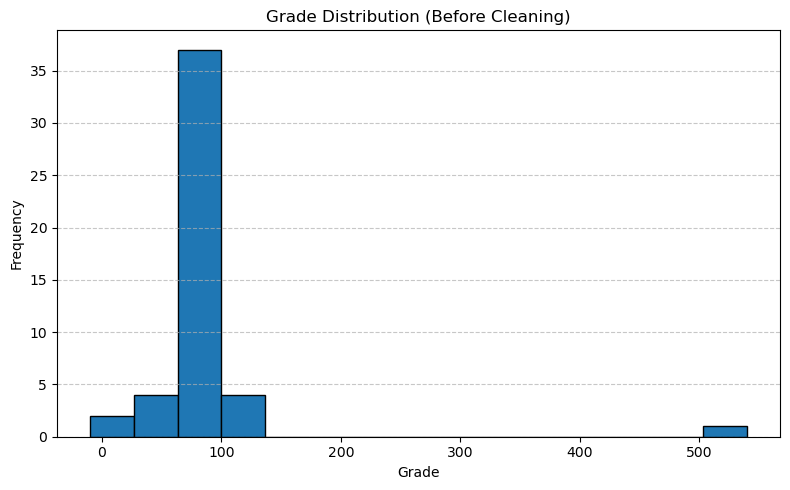

In [6]:
# --- Histogram: Distribution of Raw Grades (Before Cleaning) ---
plt.figure(figsize=(8, 5))
df_dirty["Grade"].plot(kind="hist", bins=15, edgecolor="black")

plt.title("Grade Distribution (Before Cleaning)")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



## 7) Cleaning Strategy (Documented Rules)

We will apply **clear, reproducible** rules:
1. **Fix obvious 10× typos**: if `Grade > 100` *and* ends with `0`, divide by 10 (e.g., `540 → 54`).  
2. **Clip out-of-range values**: after step 1, clip remaining grades to `[0, 100]`.  
3. **Impute missing values**: use the **median** (robust to outliers) of valid grades.  
4. Keep a **cleaning log** of what changed.

In [7]:
# --- Step-by-step Cleaning Process ---
df_clean = df_dirty.copy()
cleaning_log = []

# 1. Fix suspected 10x-typo errors
ten_x_mask = df_clean["Grade"].apply(
    lambda x: isinstance(x, (int, float)) and x > 100 and abs(x / 10 - round(x / 10)) < 1e-9
)
df_clean.loc[ten_x_mask, "Grade"] = df_clean.loc[ten_x_mask, "Grade"] / 10.0
cleaning_log.append(f" Divided {ten_x_mask.sum()} suspected 10x-typo grade(s) by 10.")

# 2. Clip out-of-range values to [0, 100]
before_clip = ((df_clean["Grade"] < 0) | (df_clean["Grade"] > 100)).sum(skipna=True)
df_clean["Grade"] = df_clean["Grade"].clip(lower=0, upper=100)
after_clip = ((df_clean["Grade"] < 0) | (df_clean["Grade"] > 100)).sum(skipna=True)
cleaning_log.append(f" Clipped out-of-range grades: before={before_clip}, after={after_clip}.")

# 3. Impute missing grades with the median
median_grade = df_clean["Grade"].median(skipna=True)
n_missing = df_clean["Grade"].isna().sum()
df_clean["Grade"] = df_clean["Grade"].fillna(median_grade)
cleaning_log.append(f" Imputed {n_missing} missing grade(s) with median = {median_grade:.1f}.")

# --- Display cleaning log and sample cleaned data ---
print(" Cleaning Log:")
print("\n".join(cleaning_log))

# Preview cleaned data
df_clean.head(10)


 Cleaning Log:
 Divided 1 suspected 10x-typo grade(s) by 10.
 Clipped out-of-range grades: before=3, after=0.
 Imputed 2 missing grade(s) with median = 76.6.


,FirstName,LastName,Grade
0,Val,Wilson,77.6
1,Skyler,Green,73.1
2,Drew,Harris,77.0
3,Shay,Brown,70.5
4,Payton,King,75.0
5,Noa,Lewis,89.7
6,Reese,Wilson,89.9
7,Devon,Murphy,100.0
8,Sam,Wilson,76.1
9,Blake,Hill,62.6



## 8) Validate After Cleaning

Double‑check:
- No missing grades
- All grades within `[0, 100]`
- Summary stats look reasonable


In [8]:
# --- Post-Cleaning Validation Checks ---
has_missing = df_clean["Grade"].isna().any()
has_out_of_range = ((df_clean["Grade"] < 0) | (df_clean["Grade"] > 100)).any()

print(" Any missing values remaining?:", "Yes " if has_missing else "No ")
print(" Any out-of-range grades remaining?:", "Yes " if has_out_of_range else "No ")

# Summary statistics (cleaned data)
df_clean.describe()


 Any missing values remaining?: No 
 Any out-of-range grades remaining?: No 


,Grade
count,50.000000
mean,75.244000
std,19.642708
min,0.000000
25%,71.425000
50%,76.600000
75%,86.175000
max,100.000000



## 9) Visualize Distribution (After Cleaning)

Compare with the earlier plot. Is the distribution more plausible?


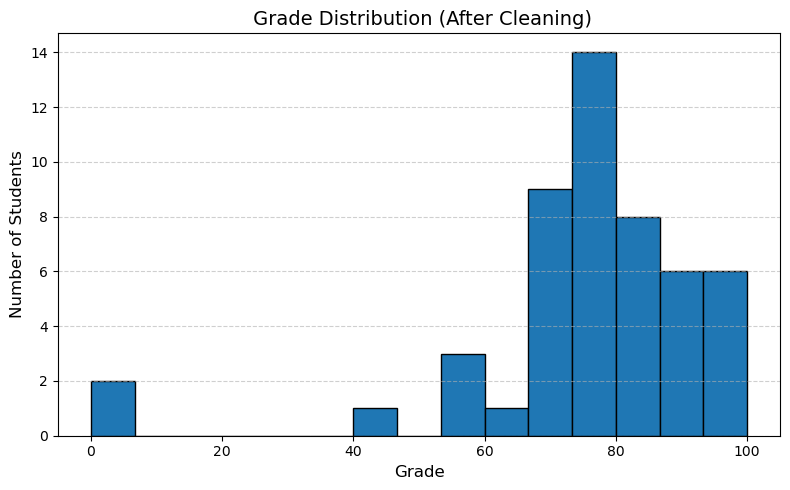

In [9]:
# --- Histogram: Grade Distribution After Cleaning ---
plt.figure(figsize=(8, 5))
df_clean["Grade"].plot(
    kind="hist",
    bins=15,
    edgecolor="black"
)

plt.title(" Grade Distribution (After Cleaning)", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## 10) Save Outputs

Save both the **raw-with-issues** and **cleaned** datasets to `outputs/` for your portfolio repo.


In [10]:
from pathlib import Path

# Create output directory if it doesn't exist
output_dir = Path("outputs")
output_dir.mkdir(parents=True, exist_ok=True)

# Define file paths
raw_data_path = output_dir / "student_grades_raw.csv"
clean_data_path = output_dir / "student_grades_clean.csv"

# Save DataFrames to CSV
df_dirty.to_csv(raw_data_path, index=False)
df_clean.to_csv(clean_data_path, index=False)

# Confirm successful save
print(f" Raw dataset saved to: {raw_data_path}")
print(f" Cleaned dataset saved to: {clean_data_path}")


 Raw dataset saved to: outputs\student_grades_raw.csv
 Cleaned dataset saved to: outputs\student_grades_clean.csv



## 11) Reflection (Short Answer)

Add a few bullets here summarizing what you learned:
- Which checks caught the most issues?
- Which assumptions did you make? Are they defensible?
- If this were a production pipeline, how would you log anomalies and fixes?
- What would you change if you had categorical grades (A/B/C) instead of numeric?


In [11]:
# 11) Reflection (Short Answer)
reflection_text = """
 11) Reflection (Short Answer)

A few key takeaways from this exploratory data analysis exercise:

 What did I learn?
- Data quality checks matter.
  - The most impactful issues were caught through simple but targeted rules:
    - Detecting missing values,
    - Flagging out-of-range numbers,
    - Catching 10× scaling typos (like 540 instead of 54).
- EDA is more than just summary stats.
  - Visuals (like histograms) helped reveal skew and unusual values that were less obvious in raw tables.

 Assumptions made
- Values ending in '0' and >100 were assumed to be 10× typos — e.g., 540 → 54.
  - This is reasonable for numeric inputs like grades, but in real data, I’d want to confirm with domain experts.
- Clipping to [0, 100] assumes grades are percentage-based and bounded.
  - This is common, but wouldn’t apply in other contexts (e.g., GPA or unbounded scoring systems).
- Missing grades were imputed using the median, assuming it's more robust to outliers than the mean.
  - In real systems, the imputation method might differ based on data source or importance.

 If this were production...
- I would log all anomalies with:
  - Timestamp,
  - Student identifiers,
  - Type of issue (e.g., missing, negative, extreme),
  - Correction applied.
- This would ensure transparency and auditability, especially for automated pipelines.

 If grades were categorical (A/B/C/D/F)...
- I'd define a valid set of labels and check for:
  - Spelling errors,
  - Mixed formats (e.g., "A+", "a", "B "),
  - Missing or unexpected values.
- Visualizations would shift to bar plots instead of histograms.
- Instead of numeric imputation, I might impute missing categories using the mode or based on class distribution.

"""

print(reflection_text)



 11) Reflection (Short Answer)

A few key takeaways from this exploratory data analysis exercise:

 What did I learn?
- Data quality checks matter.
  - The most impactful issues were caught through simple but targeted rules:
    - Detecting missing values,
    - Flagging out-of-range numbers,
    - Catching 10× scaling typos (like 540 instead of 54).
- EDA is more than just summary stats.
  - Visuals (like histograms) helped reveal skew and unusual values that were less obvious in raw tables.

 Assumptions made
- Values ending in '0' and >100 were assumed to be 10× typos — e.g., 540 → 54.
  - This is reasonable for numeric inputs like grades, but in real data, I’d want to confirm with domain experts.
- Clipping to [0, 100] assumes grades are percentage-based and bounded.
  - This is common, but wouldn’t apply in other contexts (e.g., GPA or unbounded scoring systems).
- Missing grades were imputed using the median, assuming it's more robust to outliers than the mean.
  - In real syste